In [1]:
from showit import image
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from extraction.utils import make_gaussian
data, series, truth = make_gaussian(n=5, seed=42, noise=0.5, withparams=True)

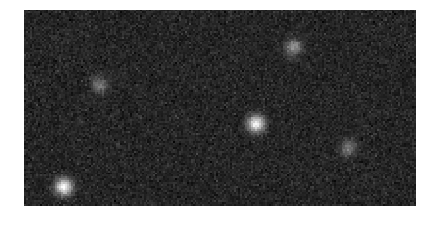

In [4]:
base = data.mean().toarray()
image(base);

In [5]:
from extraction import CNMFWRAP
algorithm = CNMFWRAP(k=5, gSig=[4,4], merge_thresh=0.8)

In [6]:
model = algorithm.fit(data, chunk_size=(100,200))

TypeError: 'module' object is not callable

In [ ]:
image(model.regions.mask(dims=data.shape[1:], cmap_stroke='rainbow', fill=None, base=base));

In [ ]:
image(truth.regions.mask(dims=data.shape[1:], cmap='rainbow', stroke='black', base=base));

In [ ]:
plt.plot(model.transform(data).toarray().T);
plt.axis('off');

In [ ]:
plt.plot(series.T);
plt.axis('off');